## Solving spring-mass problems using LU decomposition

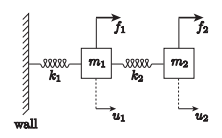

We will introduce here a simple system of springs and masses, shown in figure above. Mass 1 has
mass m1; Mass 1 is connected to a stationary wall by a spring with stiffness k1, and to Mass 2 by
a spring with stiffness k2. Mass 2 has mass m2; Mass 2 is connected only to Mass 1 (by the spring
with stiffness k2). We shall assume that k1 ≥ 0 and k2 ≥ 0.
We denote the displacements of Mass 1 and Mass 2 by u1 and u2, respectively: positive values
correspond to displacement away from the wall; we choose our reference such that in the absence
of applied forces — the springs unstretched — u1 = u2 = 0. We next introduce (steady) forces f1
and f2 on Mass 1 and Mass 2, respectively; positive values correspond to force away from the wall.
We would like to find the equilibrium displacements of the two masses, u1 and u2, for prescribed
forces f1 and f2.


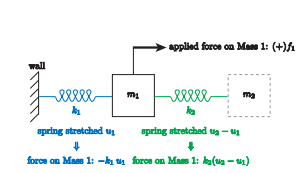

We now derive the equations which must be satisfied by the displacements u1 and u2 at equilibrium. We first consider the forces on Mass 1, as shown in figure above. Note we apply here Hooke’s
law — a constitutive relation — to relate the force in the spring to the compression or extension
of the spring. In equilibrium the sum of the forces on Mass 1 — the applied forces and the forces
due to the spring — must sum to zero, which yields equation 1 as:
$$f1 − k1*u1 + k2*(u2 − u1) = 0 $$
Similarly for mass2 equation 2 becomes:
$$f2 − k2*(u2 − u1) = 0$$
Mathematically, our equations correspond to a system of n = 2 linear equations, more precisely,
2 equations in 2 unknowns.


Here u1 and u2 are unknown, and are placed on the left-hand side of the equations, and f1 and
f2 are known, and placed on the right-hand side of the equations.
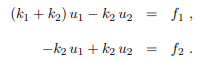

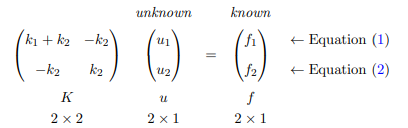
this becomes a simple representation of the system

In [1]:
#Considering a simple problem where f1=5N,f2=3N,k1=2 and k2=6
import numpy as np
n = int(input('ENTER NUMBER OF UNKNOWNS:'))
def backsub_one(lower,col,n):
  
    y[0] = col[0]/lower[0][0]
    for i in range(1,n):
        y[i] = col[i]
        for j in range(0,i):
            y[i] = y[i] - lower[i][j]*y[j]
        y[i]=y[i]/lower[i][i]
    return y
def backsub_two(upper,y,n):
   
   
    x[n-1] =float(y[n-1]/upper[n-1][n-1])
    for i in range(n-2,-1,-1):
        x[i] = y[i]
    
        for j in range(i+1,n):
            x[i] = float(x[i] - upper[i][j]*x[j])
    
        x[i] = float(x[i]/upper[i][i])
    return x
matrix = np.zeros((n,n))
upper=np.zeros((n,n))
lower=np.zeros((n,n))
y = np.zeros(n)
x = np.zeros(n)
col = np.zeros(n)
inv=np.zeros((n,n))
print('ENTER AUGMENTED MATRIX COEFFICIENTS:')
for i in range (n):
    for j in range (n):
        matrix[i][j]= float(input())
print(matrix)
for i in range(n):
    
    for k in range(i,n):
        sum = 0;
        for j in range(i):
            sum += (lower[i][j]*upper[j][k]);
            
        upper[i][k] = float(matrix[i][k]- sum);
    
    
    for k in range(i,n):
        if (i== k):
            lower[i][i] = 1;
        else:
            sum=0;
            for j in range(i):
                sum += (lower[k][j] * upper[j][i]);
                
            lower[k][i]= float((matrix[k][i] - sum)/ upper[i][i]); 
print('ENTER THE COEFFICIENTS OF COLUMN ON RHS:')
for i in range (n):
    col[i]= float(input()) 
for i in range(n):
    
    y1=backsub_one(lower,col,n)
    x1=backsub_two(upper,y1,n)   
print(x1)   

ENTER NUMBER OF UNKNOWNS:2
ENTER AUGMENTED MATRIX COEFFICIENTS:
8
-6
-6
6
[[ 8. -6.]
 [-6.  6.]]
ENTER THE COEFFICIENTS OF COLUMN ON RHS:
5
3
[4.  4.5]
